<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Classification: Predicting Left-Handedness from Psychological Factors

---

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

In [ ]:
# Is there an association between being left-handed and having higher scores in creativity-related personality dimensions (such as openness to experience)?
# How do mean personality trait scores differ between left-handed and right-handed individuals?
# Does handedness (left-handed vs. right-handed) significantly predict differences in personality traits such as openness, conscientiousness, or extraversion?

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
# library imports
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Q1\tQ2\tQ3\tQ4\tQ5\tQ6\tQ7\tQ8\tQ9\tQ10\tQ11\tQ12\tQ13\tQ14\tQ15\tQ16\tQ17\tQ18\tQ19\tQ20\tQ21\tQ22\tQ23\tQ24\tQ25\tQ26\tQ27\tQ28\tQ29\tQ30\tQ31\tQ32\tQ33\tQ34\tQ35\tQ36\tQ37\tQ38\tQ39\tQ40\tQ41\tQ42\tQ43\tQ44\tintroelapse\ttestelapse\tcountry\tfromgoogle\tengnat\tage\teducation\tgender\torientation\trace\treligion\thand
0,4\t1\t5\t1\t5\t1\t5\t1\t4\t1\t1\t1\t5\t5\t5\t1...
1,1\t5\t1\t4\t2\t5\t5\t4\t1\t5\t2\t5\t3\t4\t1\t4...
2,1\t2\t1\t1\t5\t4\t3\t2\t1\t4\t4\t5\t4\t3\t4\t1...
3,1\t4\t1\t5\t1\t4\t5\t4\t3\t5\t1\t3\t2\t3\t1\t5...
4,5\t1\t5\t1\t5\t1\t5\t1\t3\t1\t1\t1\t5\t5\t5\t1...


In [4]:
# it is look like using TSV format

In [5]:
# try with another way
df = pd.read_csv("data.csv", sep='\t')

In [6]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [7]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


* Personality and handedness connection is subtle.
Research suggests that left-handedness may be weakly associated with certain cognitive or creative tendencies, but strong evidence linking it directly to personality traits is limited.
Source: Nicholls, M. E. R., et al. (2010). “Handedness and personality: a critical review.” Neuropsychologia, 48(12), 3326–3332.

* Left-handed individuals sometimes score higher in "openness to experience."
Studies have found that left-handers might show slightly higher creativity, divergent thinking, and openness.
Source: Coren, S. (1992). “The Left-Hander Syndrome: The Causes and Consequences of Left-Handedness.”

* No consistent difference in extraversion, agreeableness, or conscientiousness.
Most big-five traits (especially extraversion, agreeableness, neuroticism) show no significant difference between left- and right-handers in large-scale data.
Source: Niebauer, C. L., et al. (2004). “Handedness and the Big Five personality factors.” Laterality, 9(1), 25–37.

* Possible brain lateralization differences.
Left-handed people often have more symmetrical brain hemispheres, which may relate to differences in thought processing, but this doesn’t directly translate to measurable personality differences.

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [8]:
# Look at the first few rows
print(df.head())

# Check basic info
print(df.info())

# Quick summary statistics
print(df.describe())


   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  country  fromgoogle  engnat  \
0   4   1   5   1   5   1   5   1   4    1  ...       US           2       1   
1   1   5   1   4   2   5   5   4   1    5  ...       CA           2       1   
2   1   2   1   1   5   4   3   2   1    4  ...       NL           2       2   
3   1   4   1   5   1   4   5   4   3    5  ...       US           2       1   
4   5   1   5   1   5   1   5   1   3    1  ...       US           2       1   

   age  education  gender  orientation  race  religion  hand  
0   22          3       1            1     3         2     3  
1   14          1       2            2     6         1     1  
2   30          4       1            1     1         1     2  
3   18          2       2            5     3         2     2  
4   22          3       1            1     3         2     3  

[5 rows x 56 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column

In [9]:
# Count missing values per column
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [10]:
# Select only Q1–Q44 + handedness column
cols = [f"Q{i}" for i in range(1, 45)] + ["hand"]
df_model = df[cols]

# Confirm selection
print(df_model.head())


   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q36  Q37  Q38  Q39  Q40  Q41  \
0   4   1   5   1   5   1   5   1   4    1  ...    1    1    1    5    5    5   
1   1   5   1   4   2   5   5   4   1    5  ...    4    4    4    1    3    1   
2   1   2   1   1   5   4   3   2   1    4  ...    2    4    2    1    4    2   
3   1   4   1   5   1   4   5   4   3    5  ...    1    3    4    1    2    1   
4   5   1   5   1   5   1   5   1   3    1  ...    1    1    1    5    5    5   

   Q42  Q43  Q44  hand  
0    1    5    1     3  
1    4    4    5     1  
2    2    2    2     2  
3    1    1    3     2  
4    1    5    1     3  

[5 rows x 45 columns]


hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64


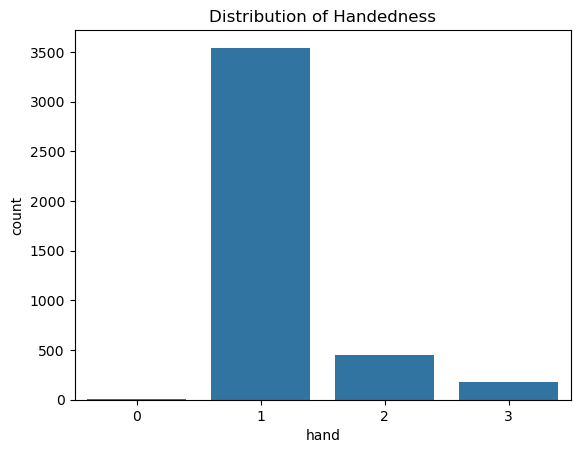

In [11]:
# Frequency count of left/right-handed people
print(df_model['hand'].value_counts())

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='hand', data=df_model)
plt.title("Distribution of Handedness")
plt.show()


In [12]:
# Correlation between each question and handedness (if hand is numeric)
# If 'hand' is categorical, you can encode it:
df_model['hand_num'] = df_model['hand'].map({'Right': 0, 'Left': 1})

# Check correlations
corrs = df_model.corr(numeric_only=True)['hand_num'].sort_values(ascending=False)
print(corrs.head(10))


Q1    NaN
Q2    NaN
Q3    NaN
Q4    NaN
Q5    NaN
Q6    NaN
Q7    NaN
Q8    NaN
Q9    NaN
Q10   NaN
Name: hand_num, dtype: float64


C:\Users\Salman\AppData\Local\Temp\ipykernel_22328\4030896037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['hand_num'] = df_model['hand'].map({'Right': 0, 'Left': 1})


### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

* After looking at the data frame and focusing on the features from Q1 to Q44.
* These questions look like scaling from 1 to 5.
* I can use it with the other features as dependents (x).
* The feature of hand I can use it as an independent (y).
* By focusing on the independent column, I can discover 4 main variables, these variables are: 0, 1, 2, 3
* After these bullet points, I can say the type of this dataframe is a classification problem.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

In [19]:
# We standardize variables to ensure that all features contribute equally to distance-based models like KNN. 
# Without standardization, features with larger numeric scales dominate the model. 
# For example, in predicting left-handedness, if age ranges from 0–100 and survey scores range from 1–5,
# age would unfairly influence the predictions unless both variables are standardized.

### 7. Give an example of when we might not standardize our variables.

In [20]:
# We might not standardize our variables when the model is not sensitive to scale, such as Decision Trees or Random Forests,
# or when all variables are already measured on the same scale (e.g., all questions rated 1–5).
# Additionally, in some regression analyses, we avoid standardization to preserve the interpretability of coefficients in their original units.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

* thnks for this question, actully that depened on the featuers that we will use it to build the model.
* for example, if we use the age feature this mean we need to standerdize the model
* because the age attribute include variables like 37 meanwhile the variables from Q1 to Q44 just from 0 to 5.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

In [13]:
df['hand'].value_counts()


hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [14]:
# Remove only invalid values (0)
df = df[df['hand'].isin([1, 2, 3])]

# Recode to readable labels if you like
df['handedness'] = df['hand'].map({1: 'Right', 2: 'Left', 3: 'Both'})

# Check the distribution
print(df['handedness'].value_counts())


handedness
Right    3542
Left      452
Both      179
Name: count, dtype: int64


---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be all Q columns. 
- (Optional : You may use stratify = 'y')

I'll first create my `X` and `y` dataframes:

In [15]:
# Features: the 44 personality questions
X = df.loc[:, 'Q1':'Q44']

# Target: handedness (binary or multiclass)
y = df['handedness']


In [16]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps class balance
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # you can tune k later
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best. 
 - try k=3,5,15, and 25

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 15, 25]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))
    print(f"k = {k} --> Accuracy = {acc:.4f}")


k = 3 --> Accuracy = 0.8024
k = 5 --> Accuracy = 0.8275
k = 15 --> Accuracy = 0.8491
k = 25 --> Accuracy = 0.8491


In [21]:
results_df = pd.DataFrame(results, columns=['k', 'Accuracy'])
print(results_df)


    k  Accuracy
0   3  0.802395
1   5  0.827545
2  15  0.849102
3  25  0.849102


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [22]:

k_values = [3, 5, 15, 25]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predictions on train and test sets
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results.append((k, train_acc, test_acc))
    print(f"k={k:2} | Train Accuracy={train_acc:.3f} | Test Accuracy={test_acc:.3f}")
    
results_df = pd.DataFrame(results, columns=['k', 'Train Accuracy', 'Test Accuracy'])


k= 3 | Train Accuracy=0.869 | Test Accuracy=0.802
k= 5 | Train Accuracy=0.856 | Test Accuracy=0.828
k=15 | Train Accuracy=0.849 | Test Accuracy=0.849
k=25 | Train Accuracy=0.849 | Test Accuracy=0.849


In [23]:
print(results_df)


    k  Train Accuracy  Test Accuracy
0   3        0.869083       0.802395
1   5        0.855602       0.827545
2  15        0.849011       0.849102
3  25        0.848712       0.849102


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?